In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# from dask.distributed import Client, LocalCluster
# cluster = LocalCluster()
# client = Client(cluster)

In [3]:
# print(client)


In [4]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/106327943.gadi-pbs'

In [5]:
# load single ROMS netcdf with xr
ds_raw = xr.open_dataset('../data/proc/roms_v11_TotOptions_his_0003_5daymn.nc')
# ds_raw = xr.open_dataset('/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_TotOptions/roms_avg_0003.nc')
ds_raw

grd = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_v11_grd.nc')

In [6]:
ds_raw.nbytes/1e9

51.087459168

In [7]:
# ds_raw = ds_raw.drop_vars({'omega','w','ubar','vbar','u','v'})
ds_raw = ds_raw.drop_vars({'w','u','v','Tb','Sb','ubar_eastward','vbar_northward','shflux','ssflux','sustr','svstr','zeta'})
ds_raw.nbytes/1e9

ds_raw = ds_raw.assign_coords(lon_rho=grd.lon_rho)
ds_raw = ds_raw.assign_coords(lat_rho=grd.lat_rho)

ds_raw['mask_zice'] = (ds_raw.mask_rho.where(ds_raw.zice<0)==1) # make a logic mask for ice
ds_raw['mask_zice_nan'] = (ds_raw.mask_rho.where(ds_raw.zice<0)==1).where(ds_raw.mask_rho.where(ds_raw.zice<0)==1) # make a mask where non-ice is nan


In [8]:
ds_raw

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2009-01-03 ... 2009-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    lon_rho          (eta_rho, xi_rho) float64 ...
    lat_rho          (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/34)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    m                (ocean_time, eta_rho, xi_rho) float32 ...
    u_eastward       (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    v_northward      (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0003.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Tue Jan 16 17:41:51 2024: cdo -v timselmean,5 /g/data/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [9]:
ds_raw.load()

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2009-01-03 ... 2009-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    lon_rho          (eta_rho, xi_rho) float64 89.96 89.96 89.96 ... 65.55 65.56
    lat_rho          (eta_rho, xi_rho) float64 -76.25 -76.23 ... -57.53 -57.51
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/34)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] 2009-01-01 ... 2009-12-31
    nl_tnu2          (tracer) float64 0.0 0.0
    LtracerSponge    (tracer) int32 0 0
    Akt_bak          (tracer) float64 1e-06 1e-06
    Tnudg            (tracer) float64 0.03333 0.03333
    FSobc_in         (boundary) float64 0.0 0.0 0.0 0.0
    ...               ...
    m                (ocean_time, eta_rho, xi_rho) float32 1e+37 1e+37 ... 0.0
    u_eastward       (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 0.0
    v_northward      (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 0.0
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 1.556
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 34.35
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... 27.5
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0003.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Tue Jan 16 17:41:51 2024: cdo -v timselmean,5 /g/data/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

Text(0, 0.5, 'surface temp ($^\\circ$C)')

<Figure size 640x480 with 0 Axes>

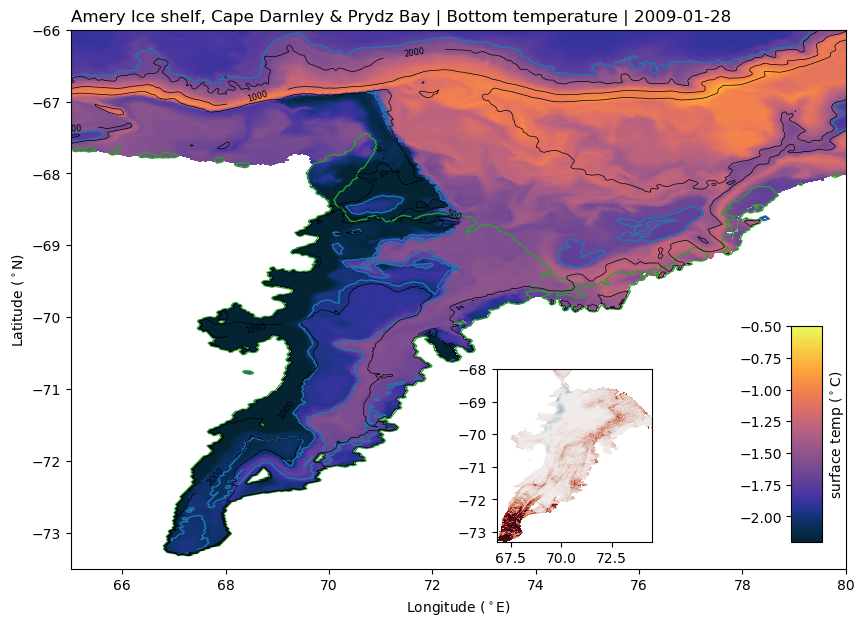

In [89]:
from matplotlib.colors import TwoSlopeNorm


tt=5
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(gs[0,0])
im = ds_raw.temp.isel(s_rho=0,ocean_time=tt).plot(x='lon_rho',y='lat_rho',cmap='cmo.thermal',vmin=-2.2,vmax=-.5,add_colorbar=False)

where_dsw = (ds_raw.temp.isel(s_rho=0,ocean_time=tt)<-1.7) & (ds_raw.salt.isel(s_rho=0,ocean_time=tt)>34.5)
co_dsw = plt.contour(grd.lon_rho,grd.lat_rho,where_dsw,levels=(0,1),colors='C0',linestyles='-',linewidths=1)

co = plt.contour(grd.lon_rho,grd.lat_rho,grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co = plt.contour(grd.lon_rho,grd.lat_rho,grd.h*grd.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)

ax_melt = inset_axes(ax,
                 width="40%",  # width = 10% of parent_bbox width
                 height="40%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.55,.05, .5, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
cmap_min=-5
cmap_max=10
# norm = TwoSlopeNorm(vmin=cmap_min, vcenter=0, vmax=cmap_max)
newcmap = cmocean.tools.crop(cmocean.cm.balance, vmin=cmap_min,vmax=cmap_max,pivot=0)

im_m = (ds_raw.m*(60*60*24*365)*ds_raw.mask_zice_nan).isel(ocean_time=tt).plot(x='lon_rho',y='lat_rho',vmin=cmap_min,vmax=cmap_max,cmap=newcmap,add_colorbar=False)
ax_melt.set_xlim((66.8,74.5))
ax_melt.set_ylim((-73.3,-68))
ax_melt.set_xlabel('')
ax_melt.set_ylabel('')
ax_melt.set_title('')

plt.clabel(co,fontsize=6,inline_spacing=0,inline=True)
ax.set_title('')
ax.set_title('Amery Ice shelf, Cape Darnley & Prydz Bay | Bottom temperature | '+str(ds_raw.ocean_time[tt].values)[:-19],loc='left')
ax.set_xlim((65,80))
ax.set_ylim((-73.5,-66))
ax.set_ylabel('Latitude ($^\circ$N)')
ax.set_xlabel('Longitude ($^\circ$E)')
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.93,.05, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im, cax=cax)
cax.yaxis.tick_left()
cax.set_ylabel('surface temp ($^\circ$C)')


Text(0, 0.5, 'surface temp ($^\\circ$C)')

<Figure size 640x480 with 0 Axes>

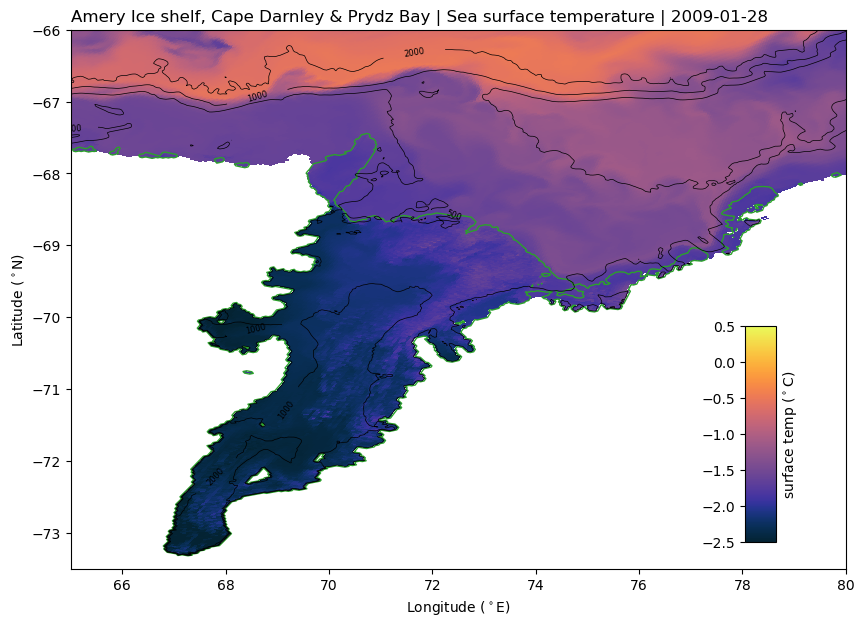

In [23]:
tt=5
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(gs[0,0])
im = ds_raw.temp.isel(s_rho=-1,ocean_time=tt).plot(x='lon_rho',y='lat_rho',cmap='cmo.thermal',vmin=-2.5,vmax=0.5,add_colorbar=False)
co = plt.contour(grd.lon_rho,grd.lat_rho,grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co = plt.contour(grd.lon_rho,grd.lat_rho,grd.h*grd.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.clabel(co,fontsize=6,inline_spacing=0,inline=True)
ax.set_title('')
ax.set_title('Amery Ice shelf, Cape Darnley & Prydz Bay | Sea surface temperature | '+str(ds_raw.ocean_time[tt].values)[:-19],loc='left')
ax.set_xlim((65,80))
ax.set_ylim((-73.5,-66))
ax.set_ylabel('Latitude ($^\circ$N)')
ax.set_xlabel('Longitude ($^\circ$E)')
cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.87,.05, .8, .8),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im, cax=cax)
cax.yaxis.tick_left()
cax.set_ylabel('surface temp ($^\circ$C)')


In [28]:
time_length=len(ds_raw.ocean_time)

for tt in range(time_length):

    gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
    plt.cla()
    plt.clf()
    fig = plt.figure(figsize=[10,7])
    ax = fig.add_subplot(gs[0,0])
    im = ds_raw.temp.isel(s_rho=-1,ocean_time=tt).plot(x='lon_rho',y='lat_rho',cmap='cmo.thermal',vmin=-2.5,vmax=0.5,add_colorbar=False)
    co = plt.contour(grd.lon_rho,grd.lat_rho,grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
    co = plt.contour(grd.lon_rho,grd.lat_rho,grd.h*grd.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
    plt.clabel(co,fontsize=6,inline_spacing=0,inline=True)
    ax.set_title('')
    ax.set_title('Amery Ice shelf, Cape Darnley & Prydz Bay | Sea surface temperature | '+str(ds_raw.ocean_time[tt].values)[:-19],loc='left')
    ax.set_xlim((65,80))
    ax.set_ylim((-73.5,-66))
    ax.set_ylabel('Latitude ($^\circ$N)')
    ax.set_xlabel('Longitude ($^\circ$E)')
    cax = inset_axes(ax,
                     width="5%",  # width = 10% of parent_bbox width
                     height="50%",  # height : 50%
                     loc='lower left',
                     bbox_to_anchor=(.87,.05, .8, .8),
                     bbox_transform=ax.transAxes,
                     borderpad=0,
                     )
    fig.colorbar(im, cax=cax)
    cax.yaxis.tick_left()
    cax.set_ylabel('surface temp ($^\circ$C)')

    
    fig.savefig('../data/out/temp_'+str(tt+1)+'.png')
    plt.close()

    
import cv2

vid_name = 'amery_temp_surf.mp4'
# Read image files
img_array = []
for i in range(time_length):
    filename=('../data/out/temp_'+str(i+1)+'.png')
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

## Output the animation   
# cv2.VideoWriter(filename, fourcc, fps, framesize, isColor)
out = cv2.VideoWriter('../data/out/'+vid_name,cv2.VideoWriter_fourcc(*'mp4v'), 5, size) 
for i in range(np.size(img_array,0)):
    out.write(img_array[i])
out.release()

<Figure size 640x480 with 0 Axes>

In [46]:
time_length=len(ds_raw.ocean_time)

for tt in range(time_length):

    gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
    plt.cla()
    plt.clf()
    fig = plt.figure(figsize=[10,7])
    ax = fig.add_subplot(gs[0,0])
    im = ds_raw.temp.isel(s_rho=0,ocean_time=tt).plot(x='lon_rho',y='lat_rho',cmap='cmo.thermal',vmin=-2.2,vmax=-.5,add_colorbar=False)
    
    where_dsw = (ds_raw.temp.isel(s_rho=0,ocean_time=tt)<-1.8) & (ds_raw.salt.isel(s_rho=0,ocean_time=tt)>34.55)
    co_dsw = plt.contour(grd.lon_rho,grd.lat_rho,where_dsw,levels=(0,1),colors='C0',linestyles='-',linewidths=1)
    
    co = plt.contour(grd.lon_rho,grd.lat_rho,grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
    co = plt.contour(grd.lon_rho,grd.lat_rho,grd.h*grd.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
    plt.clabel(co,fontsize=6,inline_spacing=0,inline=True)
    ax.set_title('')
    ax.set_title('Amery Ice shelf, Cape Darnley & Prydz Bay | Bottom temperature | '+str(ds_raw.ocean_time[tt].values)[:-19],loc='left')
    ax.set_xlim((65,80))
    ax.set_ylim((-73.5,-66))
    ax.set_ylabel('Latitude ($^\circ$N)')
    ax.set_xlabel('Longitude ($^\circ$E)')
    cax = inset_axes(ax,
                     width="5%",  # width = 10% of parent_bbox width
                     height="50%",  # height : 50%
                     loc='lower left',
                     bbox_to_anchor=(.87,.05, .8, .8),
                     bbox_transform=ax.transAxes,
                     borderpad=0,
                     )
    fig.colorbar(im, cax=cax)
    cax.yaxis.tick_left()
    cax.set_ylabel('surface temp ($^\circ$C)')

    
    fig.savefig('../data/out/temp_'+str(tt+1)+'.png')
    plt.close()

    
import cv2

vid_name = 'amery_temp_bot2.mp4'
# Read image files
img_array = []
for i in range(time_length):
    filename=('../data/out/temp_'+str(i+1)+'.png')
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


## Output the animation   
# cv2.VideoWriter(filename, fourcc, fps, framesize, isColor)
out = cv2.VideoWriter('../data/out/'+vid_name,cv2.VideoWriter_fourcc(*'mp4v'), 5, size) 
for i in range(np.size(img_array,0)):
    out.write(img_array[i])
out.release()

<Figure size 640x480 with 0 Axes>

In [90]:
time_length=len(ds_raw.ocean_time)

for tt in range(time_length):

    gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
    plt.cla()
    plt.clf()
    fig = plt.figure(figsize=[10,7])
    ax = fig.add_subplot(gs[0,0])
    im = ds_raw.temp.isel(s_rho=0,ocean_time=tt).plot(x='lon_rho',y='lat_rho',cmap='cmo.thermal',vmin=-2.2,vmax=-.5,add_colorbar=False)

    where_dsw = (ds_raw.temp.isel(s_rho=0,ocean_time=tt)<-1.7) & (ds_raw.salt.isel(s_rho=0,ocean_time=tt)>34.5)
    co_dsw = plt.contour(grd.lon_rho,grd.lat_rho,where_dsw,levels=(0,1),colors='C0',linestyles='-',linewidths=1)

    co = plt.contour(grd.lon_rho,grd.lat_rho,grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
    co = plt.contour(grd.lon_rho,grd.lat_rho,grd.h*grd.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)

    ax_melt = inset_axes(ax,
                     width="40%",  # width = 10% of parent_bbox width
                     height="40%",  # height : 50%
                     loc='lower left',
                     bbox_to_anchor=(.55,.05, .5, .8),
                     bbox_transform=ax.transAxes,
                     borderpad=0,
                     )
    cmap_min=-5
    cmap_max=10
    # norm = TwoSlopeNorm(vmin=cmap_min, vcenter=0, vmax=cmap_max)
    newcmap = cmocean.tools.crop(cmocean.cm.balance, vmin=cmap_min,vmax=cmap_max,pivot=0)

    im_m = (ds_raw.m*(60*60*24*365)*ds_raw.mask_zice_nan).isel(ocean_time=tt).plot(x='lon_rho',y='lat_rho',vmin=cmap_min,vmax=cmap_max,cmap=newcmap,add_colorbar=False)
    ax_melt.set_xlim((66.8,74.5))
    ax_melt.set_ylim((-73.3,-68))
    ax_melt.set_xlabel('')
    ax_melt.set_ylabel('')
    ax_melt.set_title('')

    plt.clabel(co,fontsize=6,inline_spacing=0,inline=True)
    ax.set_title('')
    ax.set_title('Amery Ice shelf, Cape Darnley & Prydz Bay | Bottom temperature | '+str(ds_raw.ocean_time[tt].values)[:-19],loc='left')
    ax.set_xlim((65,80))
    ax.set_ylim((-73.5,-66))
    ax.set_ylabel('Latitude ($^\circ$N)')
    ax.set_xlabel('Longitude ($^\circ$E)')
    cax = inset_axes(ax,
                     width="5%",  # width = 10% of parent_bbox width
                     height="50%",  # height : 50%
                     loc='lower left',
                     bbox_to_anchor=(.93,.05, .8, .8),
                     bbox_transform=ax.transAxes,
                     borderpad=0,
                     )
    fig.colorbar(im, cax=cax)
    cax.yaxis.tick_left()
    cax.set_ylabel('surface temp ($^\circ$C)')

    
    fig.savefig('../data/out/temp_'+str(tt+1)+'.png')
    plt.close()

    
import cv2

vid_name = 'amery_temp_bot3.mp4'
# Read image files
img_array = []
for i in range(time_length):
    filename=('../data/out/temp_'+str(i+1)+'.png')
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


## Output the animation   
# cv2.VideoWriter(filename, fourcc, fps, framesize, isColor)
out = cv2.VideoWriter('../data/out/'+vid_name,cv2.VideoWriter_fourcc(*'mp4v'), 5, size) 
for i in range(np.size(img_array,0)):
    out.write(img_array[i])
out.release()

<Figure size 640x480 with 0 Axes>

In [ ]:
ds_raw.salt.isel(s_rho=0,ocean_time=-1).plot(cmap='cmo.haline')

In [ ]:
ds_raw.rho.isel(s_rho=0,ocean_time=-1).plot(cmap='cmo.dense')

In [ ]:
STOP

In [ ]:
# ds['Vtransform']=2
# ds['hc']=20

In [ ]:
# ds.load()

In [ ]:
# # do special processing for ROMS formatting


# def processROMSGrid(ds):
#     ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

#     coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
#         'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
#         'Z':{'center':'s_rho', 'outer':'s_w'}}

#     grid = Grid(ds, coords=coords, periodic=[])

#     if ds.Vtransform == 1:
#         Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
#         z_rho = Zo_rho + (ds.zeta+ds.zice) * (1 + Zo_rho/ds.h)
#         Zo_w = ds.hc * (ds.s_w - ds.Cs_w) + ds.Cs_w * ds.h
#         z_w = Zo_w + (ds.zeta+ds.zice) * (1 + Zo_w/ds.h)
#         del Zo_rho, Zo_w
#     elif ds.Vtransform == 2:
#         Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
#         z_rho = (ds.zeta+ds.zice) + ((ds.zeta+ds.zice) + ds.h) * Zo_rho
#         Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
#         z_w = Zo_w * ((ds.zeta+ds.zice) + ds.h) + (ds.zeta+ds.zice)
#         del Zo_rho, Zo_w
#     print('making vertical coordinates')
    
#     ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
#     ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
#     # Other Option is to transpose arrays and fill NaNs with a minimal depth
#     # ds['z_rho'] = z_rho.transpose(*('time', 's_rho','yh','xh'),transpose_coords=False).fillna(hmin)
#     # ds['z_w'] = z_w.transpose(*('time', 's_w','yh','xh'),transpose_coords=False).fillna(hmin)
#     ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
#     ds["z_rho0"] = ds.z_rho0.fillna(0)
#     del z_rho, z_w

#      # interpolate depth of levels at U and V points
#     ds['z_u'] = grid.interp(ds['z_rho'], 'X', boundary='fill')
#     ds['z_v'] = grid.interp(ds['z_rho'], 'Y', boundary='fill')
#     print('made V transform coordinates')

#     print('making x/y metrics')
#     ds['pm_v'] = grid.interp(ds.pm, 'Y')
#     ds['pn_u'] = grid.interp(ds.pn, 'X')
#     ds['pm_u'] = grid.interp(ds.pm, 'X')
#     ds['pn_v'] = grid.interp(ds.pn, 'Y')
#     ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
#     ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

#     ds['dx'] = 1/ds.pm
#     ds['dx_u'] = 1/ds.pm_u
#     ds['dx_v'] = 1/ds.pm_v
#     ds['dx_psi'] = 1/ds.pm_psi

#     ds['dy'] = 1/ds.pn
#     ds['dy_u'] = 1/ds.pn_u
#     ds['dy_v'] = 1/ds.pn_v
#     ds['dy_psi'] = 1/ds.pn_psi
#     print('making z metrics')

#     ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
#     ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
#     ds['dz_u'] = grid.interp(ds.dz, 'X')
#     ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
#     ds['dz_v'] = grid.interp(ds.dz, 'Y')
#     ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

#     ds['dA'] = ds.dx * ds.dy

#     metrics = {
#         ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
#         ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
#         ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
#         ('X', 'Y'): ['dA'] # Areas
#     }
#     grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])
#     print('finished')
#     return ds,grid


# ds,grid = processROMSGrid(ds)



In [ ]:
# do special processing for ROMS formatting


def processROMSGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + (ds.zeta+ds.zice) * (1 + Zo_rho/ds.h)
        Zo_w = ds.hc * (ds.s_w - ds.Cs_w) + ds.Cs_w * ds.h
        z_w = Zo_w + (ds.zeta+ds.zice) * (1 + Zo_w/ds.h)
        del Zo_rho, Zo_w
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = (ds.zeta+ds.zice) + ((ds.zeta+ds.zice) + ds.h) * Zo_rho
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w = Zo_w * ((ds.zeta+ds.zice) + ds.h) + (ds.zeta+ds.zice)
        del Zo_rho, Zo_w
    print('making vertical coordinates')
    
    ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
    ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
    # Other Option is to transpose arrays and fill NaNs with a minimal depth
    # ds['z_rho'] = z_rho.transpose(*('time', 's_rho','yh','xh'),transpose_coords=False).fillna(hmin)
    # ds['z_w'] = z_w.transpose(*('time', 's_w','yh','xh'),transpose_coords=False).fillna(hmin)
    ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
    ds["z_rho0"] = ds.z_rho0.fillna(0)
    del z_rho, z_w

     # interpolate depth of levels at U and V points
    # ds['z_u'] = grid.interp(ds['z_rho'], 'X', boundary='fill')
    # ds['z_v'] = grid.interp(ds['z_rho'], 'Y', boundary='fill')
    print('made V transform coordinates')

    print('making x/y metrics')
    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi
    print('making z metrics')

    ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
    # ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
    # ds['dz_u'] = grid.interp(ds.dz, 'X')
    # ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
    # ds['dz_v'] = grid.interp(ds.dz, 'Y')
    # ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz'],# 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])
    # print('drop some unused vars')
    # ds = ds.drop_vars({'dz_u','dz_w','dz_v','dz_w_u','dz_w_v','z_u','z_v'})
    print('finished')
    print('ds size:',ds.nbytes/1e9,'G')
    return ds,grid


ds,grid = processROMSGrid(ds_raw)
del ds_raw



In [ ]:
#plot mean temp/salt conditions at surface/bottom
ds.temp.isel(s_rho=-1).mean(dim='ocean_time').plot(cmap='cmo.thermal',vmin=-2,vmax=0)
ds.zice.plot.contour(levels=[-0.001,-50],colors='k',linestyles='-',linewidths=1)
plt.show()
ds.temp.isel(s_rho=0).mean(dim='ocean_time').plot(cmap='cmo.thermal',vmin=-2,vmax=0)
ds.zice.plot.contour(levels=[-0.001,-50],colors='k',linestyles='-',linewidths=1)


In [ ]:
#plot mean temp/salt conditions at surface/bottom
plt.figure(figsize=(15,10))
plt.pcolormesh(ds.lon_rho,ds.lat_rho,ds.temp.isel(s_rho=0).mean(dim='ocean_time'),cmap='cmo.thermal',vmin=-2,vmax=0)

# ((grid.interp(ds.u.isel(s_rho=0).mean(dim='ocean_time'),'X')**2+grid.interp(ds.v.isel(s_rho=0).mean(dim='ocean_time'),'Y')**2)**0.5).plot(cmap='cmo.amp')
# plt.quiver(ds.lon_rho,ds.lat_rho,grid.interp(ds.u.isel(s_rho=0).mean(dim='ocean_time'),'X'),grid.interp(ds.v.isel(s_rho=0).mean(dim='ocean_time'),'Y'))

# ds.zice.plot.contour(levels=[-0.001,-50],colors='k',linestyles='-',linewidths=1)
plt.show()
# ds.temp.isel(s_rho=0).mean(dim='ocean_time').plot(cmap='cmo.thermal',vmin=-2,vmax=0)
# ds.zice.plot.contour(levels=[-0.001,-50],colors='k',linestyles='-',linewidths=1)


In [ ]:
# plot transect of conditions
ds.temp.isel(xi_rho=390).mean(dim='ocean_time').plot(y='z_rho0',cmap='cmo.thermal',vmin=-2,vmax=0)
plt.show()
ds.temp.isel(xi_rho=430).mean(dim='ocean_time').plot(y='z_rho0',cmap='cmo.thermal',vmin=-2,vmax=0)


In [ ]:
# plot transect of conditions
ds.temp.isel(eta_rho=350).mean(dim='ocean_time').plot(y='z_rho0',cmap='cmo.thermal',vmin=-2,vmax=0)
plt.show()
ds.temp.isel(eta_rho=360).mean(dim='ocean_time').plot(y='z_rho0',cmap='cmo.thermal',vmin=-2,vmax=0)


In [ ]:
ds

In [ ]:
# plot heat content
#OHC = rho0*cp0*dV*dT
dV = ds.dA*ds.dz.mean(dim='ocean_time')
rho0=1026
cp0=4181.3
OHC=1026*4181.3*dV*(ds.temp+273.15)


In [ ]:
# plot total OHC
TotalOHC = OHC.sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
TotalOHC.plot()
plt.show()
TotalOHC_1000 = OHC.where(ds.z_rho0>-1000, drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
TotalOHC_1000.plot()

In [ ]:
# plot under ice OHC

TotalOHC_subIce = OHC.where(ds.zice<0,drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
TotalOHC_subIce.plot()



In [ ]:
# plot mean melt rates

In [ ]:
STOP

In [ ]:
# calculate mean of DJF, mean of JJA

# calculate the month length for each value
month_length = ds.ocean_time.dt.days_in_month


## Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("ocean_time.season") / month_length.groupby("ocean_time.season").sum()
)

## Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("ocean_time.season").sum().values, np.ones(4))

## Calculate the weighted average
ds_temp_weighted = (ds.temp * weights).groupby("ocean_time.season").sum(dim="ocean_time")
ds_salt_weighted = (ds.salt * weights).groupby("ocean_time.season").sum(dim="ocean_time")
ds_u_weighted = (ds.u_eastward * weights).groupby("ocean_time.season").sum(dim="ocean_time")
ds_v_weighted = (ds.v_northward * weights).groupby("ocean_time.season").sum(dim="ocean_time")


In [ ]:
# check what difference is
(ds_temp_weighted - ds.temp.groupby("ocean_time.season").mean("ocean_time")).sel(season='DJF').isel(s_rho=-1).plot()


In [ ]:
# mean summer surface temperature
ds_temp_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.thermal',vmin=22,vmax=32)

In [ ]:
# mean winter surface temperature
ds_temp_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.thermal',vmin=16,vmax=24)

In [ ]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
im = ds_temp_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

ax = fig.add_subplot(gs[0,1])#, projection=ccrs.PlateCarree())
im = ds_temp_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

In [ ]:
# what is the depth of the top cells?
ds.z_rho0.isel(s_rho=-1).plot()

In [ ]:
def horizontalSectionROMS(grid,inputVal,targetDepth):
    # v2
    output = grid.transform(inputVal, 'Z', targetDepth,
                                    target_data=inputVal['z_rho0'],
                                    method='linear').squeeze()
    return output



In [ ]:

# gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
# plt.cla()
# plt.clf()
# fig = plt.figure(figsize=[8,6])
# ax = None


# ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# # ax.add_feature(Coast, edgecolor='black',facecolor='gray')
# im = ds_temp_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# # cax = inset_axes(ax,
# #              width="5%",  # width = 10% of parent_bbox width
# #              height="50%",  # height : 50%
# #              loc='lower left',
# #              bbox_to_anchor=(.07,.39, 1, 1),
# #              bbox_transform=ax.transAxes,
# #              borderpad=0,
# #              )
# # fig.colorbar(im, cax=cax)

# ax = fig.add_subplot(gs[0,1])#, projection=ccrs.PlateCarree())
# im = ds_temp_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.thermal',vmin=16,vmax=32)
# # cax = inset_axes(ax,
# #              width="5%",  # width = 10% of parent_bbox width
# #              height="50%",  # height : 50%
# #              loc='lower left',
# #              bbox_to_anchor=(.07,.39, 1, 1),
# #              bbox_transform=ax.transAxes,
# #              borderpad=0,
# #              )
# # fig.colorbar(im, cax=cax)

horizontalSectionROMS(grid, ds_temp_weighted, np.array([-5])).sel(season='DJF').plot(cmap='cmo.thermal',vmin=16,vmax=32)

In [ ]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
im = ds_salt_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.haline',vmin=35,vmax=36)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

ax = fig.add_subplot(gs[0,1])#, projection=ccrs.PlateCarree())
im = ds_salt_weighted.isel(s_rho=-1).sel(season='JJA').plot(cmap='cmo.haline',vmin=35,vmax=36)
# cax = inset_axes(ax,
#              width="5%",  # width = 10% of parent_bbox width
#              height="50%",  # height : 50%
#              loc='lower left',
#              bbox_to_anchor=(.07,.39, 1, 1),
#              bbox_transform=ax.transAxes,
#              borderpad=0,
#              )
# fig.colorbar(im, cax=cax)

In [ ]:
ds_grid = xr.open_dataset('../../seqld_zeroforcing_realIni/roms_his_0001.nc')
ds['lat_rho'] = ds_grid.lon_rho
ds['lat_rho'] = ds_grid.lat_rho


In [ ]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
# im = ds_salt_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.haline',vmin=35,vmax=36)



inp = np.sqrt(ds_u_weighted.isel(s_rho=-1).squeeze()**2+ds_v_weighted.isel(s_rho=-1).squeeze()**2)
im = ax.pcolormesh(ds.lon_rho,ds.lat_rho,inp.sel(season='DJF'))

str_kwargs = {"color":inp.sel(season='DJF').values,
              "linewidth":1,
              "arrowsize":1,
              "density":4,
              "cmap":"pink"}
st = ax.streamplot(ds.lon_rho.values, ds.lat_rho.values, ds_u_weighted.sel(season='DJF').isel(s_rho=-1).values, ds_v_weighted.sel(season='DJF').isel(s_rho=-1).values,**str_kwargs)


In [ ]:

gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,6])
ax = None


ax = fig.add_subplot(gs[0,0])#, projection=ccrs.PlateCarree())
# ax.add_feature(Coast, edgecolor='black',facecolor='gray')
# im = ds_salt_weighted.isel(s_rho=-1).sel(season='DJF').plot(cmap='cmo.haline',vmin=35,vmax=36)



inp = np.sqrt(ds_u_weighted.isel(s_rho=-1).squeeze()**2+ds_v_weighted.isel(s_rho=-1).squeeze()**2)
im = ax.pcolormesh(ds.lon_rho,ds.lat_rho,inp.sel(season='JJA'))
ax.contour(ds.lon_rho,ds.lat_rho,ds.h,levels=np.array((100,500,1000,2000,3000,4000)),colors='grey',linewidths=0.5)
str_kwargs = {"color":inp.sel(season='JJA').values,
              "linewidth":1,
              "arrowsize":1,
              "density":4,
              "cmap":"pink"}
st = ax.streamplot(ds.lon_rho.values, ds.lat_rho.values, ds_u_weighted.sel(season='JJA').isel(s_rho=-1).values, ds_v_weighted.sel(season='JJA').isel(s_rho=-1).values,**str_kwargs)
